# Guided waves

In this homework, we are going to visualize the fields of guided waves to gain some intuition. We will start with examples of $TE_{10}$ wave and general $TE_{mn}$ waves, then you will apply similar methods to look at TM waves.

Suppose the wave guide extends along z. Monochromatic waves propagating down the tube have the generic form
$$\tilde{\mathbf{E}}(x,y,z,t)=\tilde{\mathbf{E}}_0(x,y,z,t)e^{i(kz-\omega t)}$$
$$\tilde{\mathbf{B}}(x,y,z,t)=\tilde{\mathbf{B}}_0(x,y,z,t)e^{i(kz-\omega t)}$$
Plugging these into Maxwell's equations in vacuum, we can obtain
$$E_{0x}=\frac{i}{(\omega/c)^2-k^2}\left(k\frac{\partial E_{0z}}{\partial x}+\omega\frac{\partial B_{0z}}{\partial y}\right)$$
$$E_{0y}=\frac{i}{(\omega/c)^2-k^2}\left(k\frac{\partial E_{0z}}{\partial y}-\omega\frac{\partial B_{0z}}{\partial x}\right)$$
$$B_{0x}=\frac{i}{(\omega/c)^2-k^2}\left(k\frac{\partial B_{0z}}{\partial x}-\frac{\omega}{c^2}\frac{\partial E_{0z}}{\partial y}\right)$$
$$B_{0y}=\frac{i}{(\omega/c)^2-k^2}\left(k\frac{\partial B_{0z}}{\partial y}+\frac{\omega}{c^2}\frac{\partial E_{0z}}{\partial x}\right)$$
and
$$\left(\frac{\partial^2}{\partial x^2}+\frac{\partial^2}{\partial y^2}+(\omega/c)^2-k^2\right)E_z=0$$
$$\left(\frac{\partial^2}{\partial x^2}+\frac{\partial^2}{\partial y^2}+(\omega/c)^2-k^2\right)B_z=0$$
For TE waves, the general solution for $B_{0z}$ is
$$B_{0z}=B_0\cos(m\pi x/a)\cos(n\pi y/b)$$
with 
$$k=\sqrt{(\omega/c)^2-\pi^2[(m/a)^2+(n/b)^2]}$$
It can be seen that for a propagating wave, we need $\omega>c\pi\sqrt{(m/a)^2+(n/b)^2}\equiv\omega_{mn}$, where $\omega_{mn}$ is the cutoff frequency for $TE_{mn}$ wave. Then we have
$$k=\frac{1}{c}\sqrt{\omega^2-\omega_{mn}^2}$$

## $TE_{10}$ wave

**Exercise 1**: Let $m=1$ and $n=0$. Show that the real fields of the $TE_{10}$ wave are the following:
$$B_z=B_0\cos\left(\frac{\pi x}{a}\right)\cos(kz-\omega t)$$
$$B_x=\frac{k a}{\pi}B_0\sin\left(\frac{\pi x}{a}\right)\sin(kz-\omega t)$$
$$E_y=-\frac{\omega a}{\pi}B_0\sin\left(\frac{\pi x}{a}\right)\sin(kz-\omega t)$$
$$E_x=E_z=B_y=0$$
Notice that the fields are independent of $y$. We are going to visualize the fields on the $xz$ plane.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

We assume the widths of the wave guide are $a=2$ and $b=1$ in the x and y direction, respectively. The following code segment sets up the grid.

In [2]:
a=2
b=1
zmax=6
nx=200
nz=600

x0=np.linspace(0,a,nx+1)
z0=np.linspace(0,zmax,nz+1)

# xz grid
zz,xx=np.meshgrid(z0,x0)

We first calculate the cutoff frequency $\omega_{mn}=c\pi\sqrt{(m/a)^2+(n/b)^2}$. In the code we assume the speed of light $c=1$.

In [3]:
wc=np.pi/a
print("cutoff frequency =",wc)

cutoff frequency = 1.5707963267948966


$TE_{10}$ waves must have $\omega>\omega_{mn}$ in order to propagate. We assume $\omega=1.5\omega_{mn}$. 

In [4]:
w=1.5*wc
k=np.sqrt(w**2-wc**2)
print("k =",k)

k = 1.7562036827601817


The following code segment sets up the array of the time points, which will be used for the animation later on.

In [5]:
nframe=60
t=np.linspace(0, 6, nframe+1)

Now we are going to make a plot on the $xz$ plane. The magnetic field only has $B_x$ and $B_z$ components, namely, it lies in the $xz$ plane. The electric field only has $E_y$ component, namely, it is perpendicular to the $xz$ plane. We are going to use `streamplot` to show the magnetic field on the $xz$ plane, and `pcolormesh` to show $E_y$. We show the plot at two different times $t=0$ and $t=0.3$. 

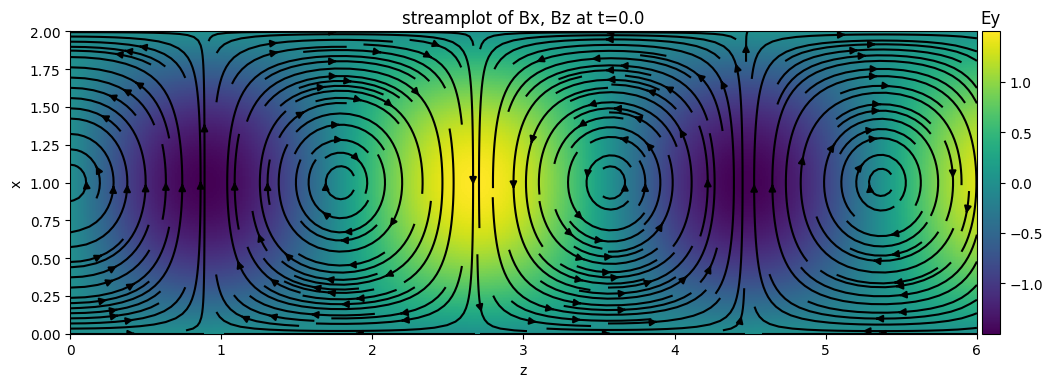

In [6]:
i=0
Bz=np.cos(np.pi*xx/a)*np.cos(k*zz-w*t[i])
Bx=k*a/np.pi*np.sin(np.pi*xx/a)*np.sin(k*zz-w*t[i])
Ey=-w*a/np.pi*np.sin(np.pi*xx/a)*np.sin(k*zz-w*t[i])
fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(zz,xx,Ey)
stm=plt.streamplot(zz,xx,Bz,Bx,density=2,color='k')
ax.set_aspect('equal')
plt.xlabel("z")
plt.ylabel("x")
plt.xlim([0,zmax])
plt.ylim([0,a])
plt.title("streamplot of Bx, Bz at t=%.1f" % t[i])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Ey')
plt.show()

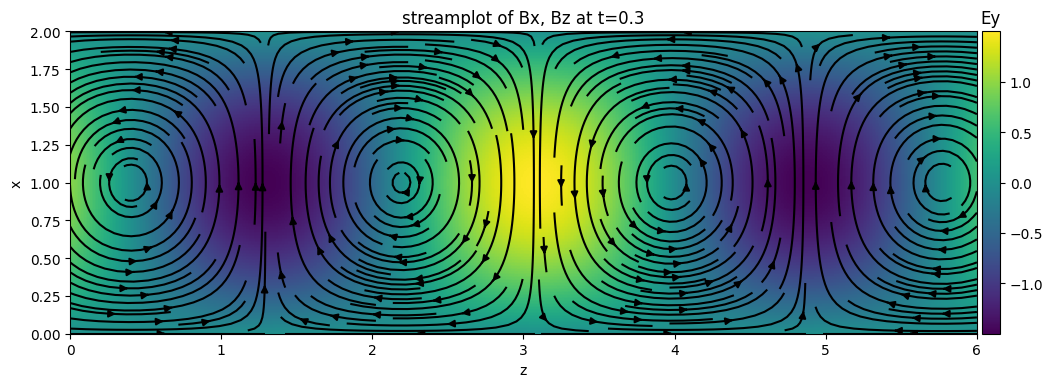

In [7]:
i=3
Bz=np.cos(np.pi*xx/a)*np.cos(k*zz-w*t[i])
Bx=k*a/np.pi*np.sin(np.pi*xx/a)*np.sin(k*zz-w*t[i])
Ey=-w*a/np.pi*np.sin(np.pi*xx/a)*np.sin(k*zz-w*t[i])
fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(zz,xx,Ey)
stm=plt.streamplot(zz,xx,Bz,Bx,density=2,color='k')
ax.set_aspect('equal')
plt.xlabel("z")
plt.ylabel("x")
plt.xlim([0,zmax])
plt.ylim([0,a])
plt.title("streamplot of Bx, Bz at t=%.1f" % t[i])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Ey')
plt.show()

The following code makes an animation. We first make a series of plots, then put these together into a movie. You need to have `ffmpeg` installed in order to make the movie.

In [8]:
import sys
import os
plotdir='./plot'
if not os.path.exists(plotdir):
    os.makedirs(plotdir)

In [9]:
for i in range(0,nframe+1):
    Bz=np.cos(np.pi*xx/a)*np.cos(k*zz-w*t[i])
    Bx=k*a/np.pi*np.sin(np.pi*xx/a)*np.sin(k*zz-w*t[i])
    Ey=-w*a/np.pi*np.sin(np.pi*xx/a)*np.sin(k*zz-w*t[i])
    fig=plt.figure(figsize=(12,4))
    ax=fig.add_subplot(111)
    im=plt.pcolormesh(zz,xx,Ey)
    stm=plt.streamplot(zz,xx,Bz,Bx,density=2,color='k')
    ax.set_aspect('equal')
    plt.xlabel("z")
    plt.ylabel("x")
    plt.xlim([0,zmax])
    plt.ylim([0,a])
    plt.title("streamplot of Bx, Bz at t=%.1f" % t[i])
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.title('Ey')
    plt.tight_layout()
    plt.savefig(os.path.join(plotdir,'slice%03d.png' % (i))) # the plots are saved as ./plot/slice000.png, ./plot/slice001.png, etc
    plt.close()

In [10]:
!ffmpeg -y -f image2 -r 6 -i plot/slice%03d.png -c:v libx264 -crf 18 -pix_fmt yuv420p TE10xz.mp4
!rm plot/slice*

ffmpeg version 6.1.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.1.0.2.5)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.1.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopen

In the above command using `ffmpeg`, the option `-r 6` specifies the frame rate, `-i plot/slice%03d.png` specifies the input figure names, `TE10xz.mp4` at the end is the movie file name. Feel free to change these according to your needs. You do not need to change other options.

## General $TE_{mn}$ mode

**Exercise 2**: Show that for general $TE_{mn}$ waves, the real fields are
$$B_{z}=B_0\cos\left(\frac{m\pi x}{a}\right)\cos\left(\frac{n\pi y}{b}\right)\cos(kz-\omega t)$$
$$E_x=\frac{\omega}{\omega_{mn}^2/c^2}\left(\frac{n\pi}{b}\right)B_0\cos\left(\frac{m\pi x}{a}\right)\sin\left(\frac{n\pi y}{b}\right)\sin(kz-\omega t)$$
$$E_y=-\frac{\omega}{\omega_{mn}^2/c^2}\left(\frac{m\pi}{a}\right)B_0\sin\left(\frac{m\pi x}{a}\right)\cos\left(\frac{n\pi y}{b}\right)\sin(kz-\omega t)$$
$$B_x=\frac{k}{\omega_{mn}^2/c^2}\left(\frac{m\pi}{a}\right)B_0\sin\left(\frac{m\pi x}{a}\right)\cos\left(\frac{n\pi y}{b}\right)\sin(kz-\omega t)$$
$$B_y=\frac{k}{\omega_{mn}^2/c^2}\left(\frac{n\pi}{b}\right)B_0\cos\left(\frac{m\pi x}{a}\right)\sin\left(\frac{n\pi y}{b}\right)\sin(kz-\omega t)$$
and of course, $E_z=0$.

We first define a function to calculate the general fields.

In [11]:
a=2.0
b=1.0
def wc(m,n):
    return np.pi*np.sqrt((m/a)**2+(n/b)**2)
def fields(m,n,x,y,z,t,w):
    k=np.sqrt(w**2-wc(m,n)**2)
    Bz=np.cos(m*np.pi*x/a)*np.cos(n*np.pi*y/b)*np.cos(k*z-w*t)
    Ex=w/wc(m,n)**2*(n*np.pi/b)*np.cos(m*np.pi*x/a)*np.sin(n*np.pi*y/b)*np.sin(k*z-w*t)
    Ey=-w/wc(m,n)**2*(m*np.pi/a)*np.sin(m*np.pi*x/a)*np.cos(n*np.pi*y/b)*np.sin(k*z-w*t)
    Bx=k/wc(m,n)**2*(m*np.pi/a)*np.sin(m*np.pi*x/a)*np.cos(n*np.pi*y/b)*np.sin(k*z-w*t)
    By=k/wc(m,n)**2*(n*np.pi/b)*np.cos(m*np.pi*x/a)*np.sin(n*np.pi*y/b)*np.sin(k*z-w*t)
    return (Bz,Ex,Ey,Bx,By)

Now we are going to look at $TE_{11}$ mode.

Firstly, we plot fields on the z=const plane at t=0.

In [12]:
nx=200
ny=100

x0=np.linspace(0,a,nx+1)
y0=np.linspace(0,b,ny+1)

# xy grid
xz,yz=np.meshgrid(x0,y0)

The following plot shows $B_x$ and $B_y$ as stream lines and $B_z$ in color.

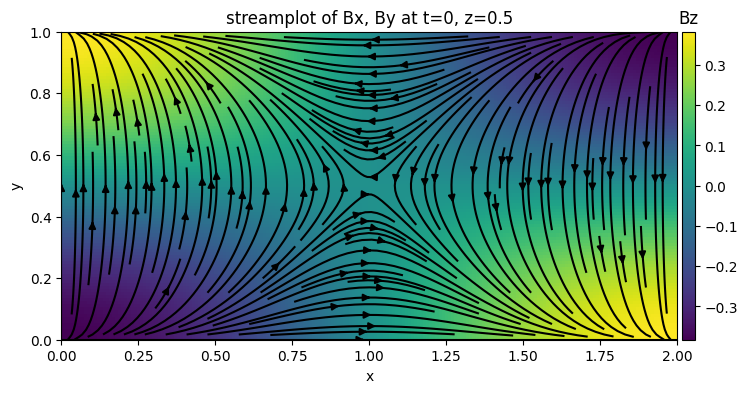

In [45]:
(Bz,Ex,Ey,Bx,By)=fields(1,1,xz,yz,0.5,0,1.5*wc(1,1))

fig=plt.figure(figsize=(9,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(xz,yz,Bz)
stm=plt.streamplot(xz,yz,Bx,By,density=2,color='k')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([0,a])
plt.ylim([0,b])
plt.title("streamplot of Bx, By at t=0, z=0.5")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Bz')
plt.show()

However, stream plot does not indicate the magnitude of the vector. In the following figure, arrows are shown for the B field component in the xy plane, with the length of the arrow indicating the magnitude of the in-plane magnetic field. $B_z$ is still shown in color.

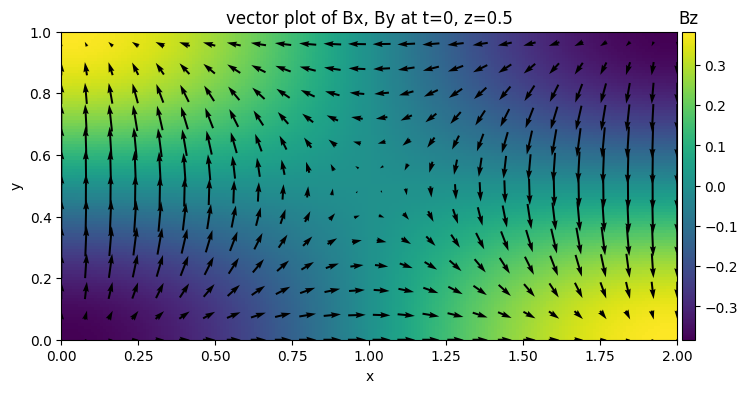

In [15]:
fig=plt.figure(figsize=(9,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(xz,yz,Bz)
step=8
plt.quiver(xz[::step,::step],yz[::step,::step],Bx[::step,::step],By[::step,::step],color='k',pivot='middle')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([0,a])
plt.ylim([0,b])
plt.title("vector plot of Bx, By at t=0, z=0.5")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Bz')
plt.show()

The following plot shows the stream line of the electric field.

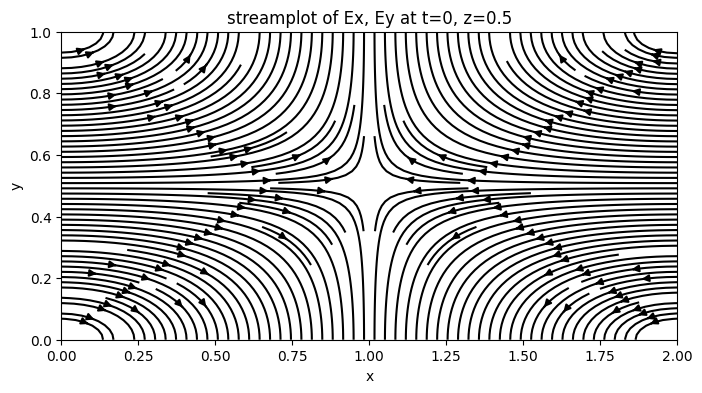

In [16]:
fig=plt.figure(figsize=(9,4))
ax=fig.add_subplot(111)
stm=plt.streamplot(xz,yz,Ex,Ey,density=2,color='k')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([0,a])
plt.ylim([0,b])
plt.title("streamplot of Ex, Ey at t=0, z=0.5")
plt.show()

Similarly, we can do `quiver` plot for the E field:

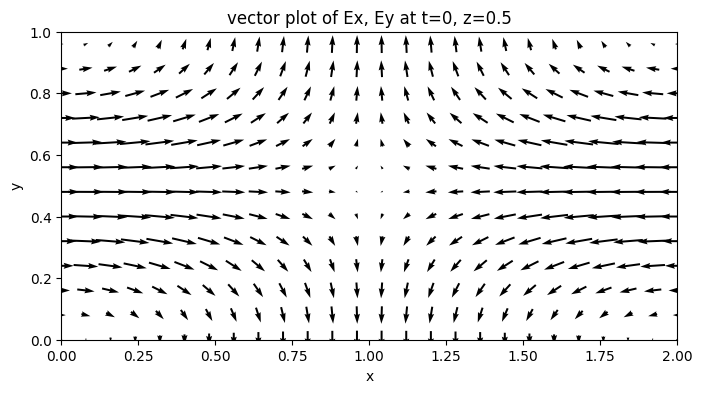

In [17]:
fig=plt.figure(figsize=(9,4))
ax=fig.add_subplot(111)
step=8
plt.quiver(xz[::step,::step],yz[::step,::step],Ex[::step,::step],Ey[::step,::step],color='k',pivot='middle')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([0,a])
plt.ylim([0,b])
plt.title("vector plot of Ex, Ey at t=0, z=0.5")
plt.show()

In what follows, we make an animation of the magnetic field on the xy plane (namely, the z=0 plane).

In [25]:
nframe=60
t=np.linspace(0, 6, nframe+1)

for i in range(0,nframe+1):
    (Bz,Ex,Ey,Bx,By)=fields(1,1,xz,yz,0,t[i],1.5*wc(1,1))
    fig=plt.figure(figsize=(9,4))
    ax=fig.add_subplot(111)
    im=plt.pcolormesh(xz,yz,Bz,vmin=-1,vmax=1)
    step=8
    plt.quiver(xz[::step,::step],yz[::step,::step],Bx[::step,::step],By[::step,::step],color='k',pivot='middle',angles='xy', scale_units='xy', scale=5)
    ax.set_aspect('equal')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim([0,a])
    plt.ylim([0,b])
    plt.title("vector plot of Bx, By at t=%.1f, z=0" % t[i])
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.title('Bz')
    plt.tight_layout()
    plt.savefig(os.path.join(plotdir,'slice%03d.png' % (i)))
    plt.close()

In [26]:
!ffmpeg -y -f image2 -r 6 -i plot/slice%03d.png -c:v libx264 -crf 18 -pix_fmt yuv420p TE11xy.mp4
!rm plot/slice*

ffmpeg version 6.1.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.1.0.2.5)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.1.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopen

Now we look at the fields on the xz plane (namely, the y=0 plane).

In [48]:
nx=200
nz=600

x0=np.linspace(0,a,nx+1)
z0=np.linspace(0,zmax,nz+1)

# xz grid
zy,xy=np.meshgrid(z0,x0)

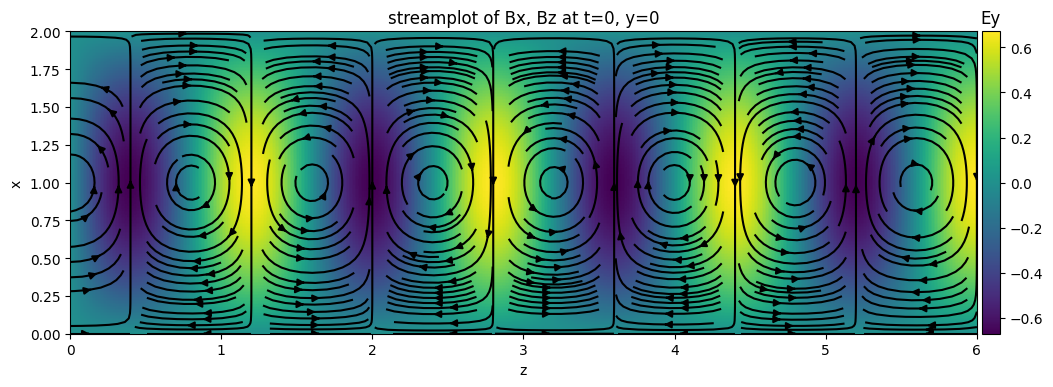

In [49]:
(Bz,Ex,Ey,Bx,By)=fields(1,1,xy,0,zy,0,1.5*wc(1,1))

fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(zy,xy,Ey)
stm=plt.streamplot(zy,xy,Bz,Bx,density=2,color='k')
ax.set_aspect('equal')
plt.xlabel("z")
plt.ylabel("x")
plt.xlim([0,zmax])
plt.ylim([0,a])
plt.title("streamplot of Bx, Bz at t=0, y=0")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Ey')
plt.show()

Now we look at the fields on the yz plane (namely, the x=0 plane).

In [50]:
ny=100
nz=600

y0=np.linspace(0,b,ny+1)
z0=np.linspace(0,zmax,nz+1)

# yz grid
zx,yx=np.meshgrid(z0,y0)

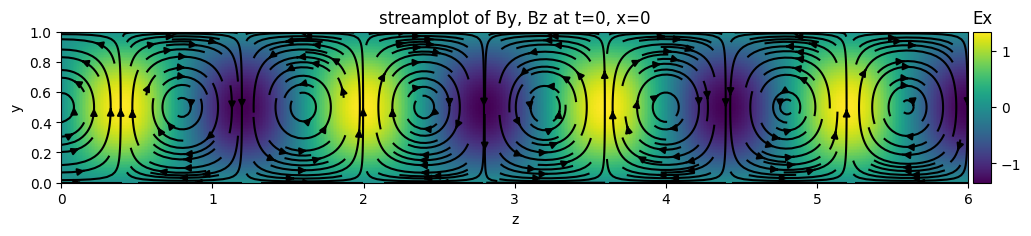

In [51]:
(Bz,Ex,Ey,Bx,By)=fields(1,1,0,yx,zx,0,1.5*wc(1,1))

fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(zx,yx,Ex)
stm=plt.streamplot(zx,yx,Bz,By,density=2,color='k')
ax.set_aspect('equal')
plt.xlabel("z")
plt.ylabel("y")
plt.xlim([0,zmax])
plt.ylim([0,b])
plt.title("streamplot of By, Bz at t=0, x=0")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Ex')
plt.show()

Here are a few more plots on the z=0.5 plane, for different $TE_{mn}$ modes.

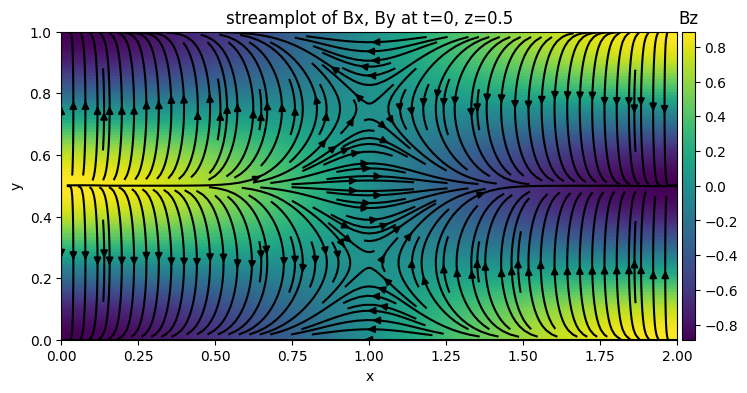

In [27]:
mm=1
nn=2
(Bz,Ex,Ey,Bx,By)=fields(mm,nn,xz,yz,0.5,0,1.5*wc(mm,nn))

fig=plt.figure(figsize=(9,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(xz,yz,Bz)
stm=plt.streamplot(xz,yz,Bx,By,density=2,color='k')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([0,a])
plt.ylim([0,b])
plt.title("streamplot of Bx, By at t=0, z=0.5")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Bz')
plt.show()

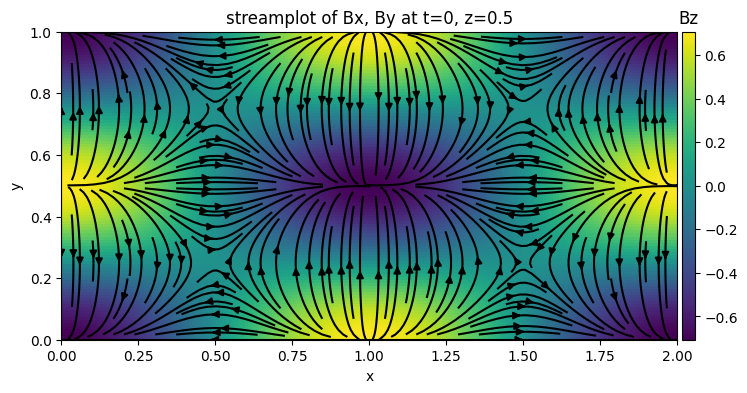

In [28]:
mm=2
nn=2
(Bz,Ex,Ey,Bx,By)=fields(mm,nn,xz,yz,0.5,0,1.5*wc(mm,nn))


fig=plt.figure(figsize=(9,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(xz,yz,Bz)
stm=plt.streamplot(xz,yz,Bx,By,density=2,color='k')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([0,a])
plt.ylim([0,b])
plt.title("streamplot of Bx, By at t=0, z=0.5")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Bz')
plt.show()

**Exercise 3**: plot out slices on z=const plane, y=const plane and x=const plane for a few more $TE_{mn}$ waves with different m, n values. What patterns can you discover?

## $TM_{mn}$ waves

**Exercise 4**: Work out the theory of TM modes for a rectangular wave guide. In particular, find the longitudinal electric field, the cutoff frequencies, and the wave and group velocities. Find the ratio of the lowest TM cutoff frequency to the lowest TE cutoff frequency, for a given wave guide. [Caution: What is the lowest TM mode?]

Now, write your own code to visualize the fields of the $TM_{mn}$ wave with the lowest m, n value. You can plot out slices on z=const, y=const, and x=const planes. Try to make time series animations of these slices.

Also plot some slices of higher m, n modes. What patterns can you find?

## Bonus problem: TEM wave in a coaxial transmission line

**Bonus exercise**: write your own code to visualize the fields of the TEM wave in a coaxial transimission line (see section 9.5.3 of the textbook for the derivation of the fields). You can plot out slices on z=const planes and $\phi$=const planes. Try to make animations of the time series of fields on a fixed plane.